In [1]:
import os.path as op
import numpy as np

import mne
%matplotlib inline

In [2]:
# Load the file and add a virtual channel for re-referencing:
raw=mne.io.read_raw_brainvision('Obj0002.vhdr',preload=True)
mne.add_reference_channels(raw, 'LiRef', copy=False)
raw.set_eeg_reference(['ReRef','LiRef'])

Extracting parameters from Obj0002.vhdr...
Setting channel info structure...
Reading 0 ... 2064249  =      0.000 ...  4128.498 secs...
Applying a custom EEG reference.
Applying a custom EEG reference.


<RawBrainVision  |  Obj0002.eeg, n_channels x n_times : 34 x 2064250 (4128.5 sec), ~535.5 MB, data loaded>

In [ ]:
raw.filter(0.1,30, method='fir')

2416 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 181 182
 183 184 185 186 187 195 196 197 200 201 202 203 205 206 207 208 210 211
 212 213 215 216 217 218 220 221 222 223 225 226 227 228 230 231 232 233
 235 236 237 238 240 241 242 243 245 246 247 248 249 250]
260 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items ac

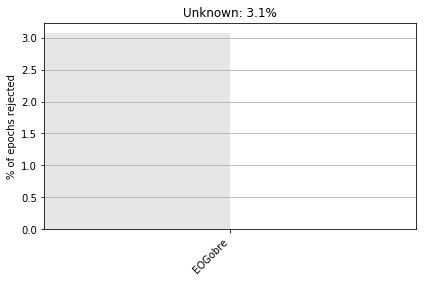

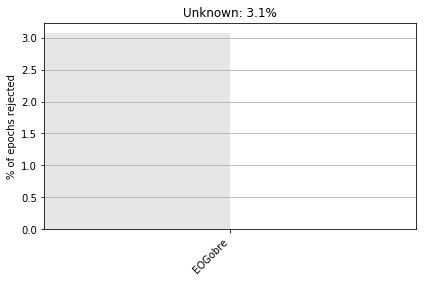

In [3]:
event_id = {'sem-yes-x': 203,
    'sem-no-x': 208,
    'world-yes-x': 213,
    'world-no-x': 218,
    'rel-yes-x': 223,
    'rel-no-x': 228,
    'abs—min-yes-x': 233,
    'abs—min-no-x': 238,
    'abs—max-yes-x': 243,
    'abs—max-no-x': 248}

tmin, tmax = -0.2, 0.5
baseline = (None, 0.0)
raw.set_channel_types({'EOGli':'eog','EOGre':'eog','EOGobre':'eog','EOGunre':'eog'})
reject = {'eog': 200e-6}

picks = mne.pick_types(raw.info,eog=True)
events = mne.find_events(raw)

# Calculate epochs
epochs = mne.Epochs(raw, events=events, event_id=event_id, tmin=tmin,
                    tmax=tmax, baseline=baseline, reject=reject, picks=picks)
epochs.drop_bad()
epochs.plot_drop_log()


Loading data for 20 events and 351 original time points ...


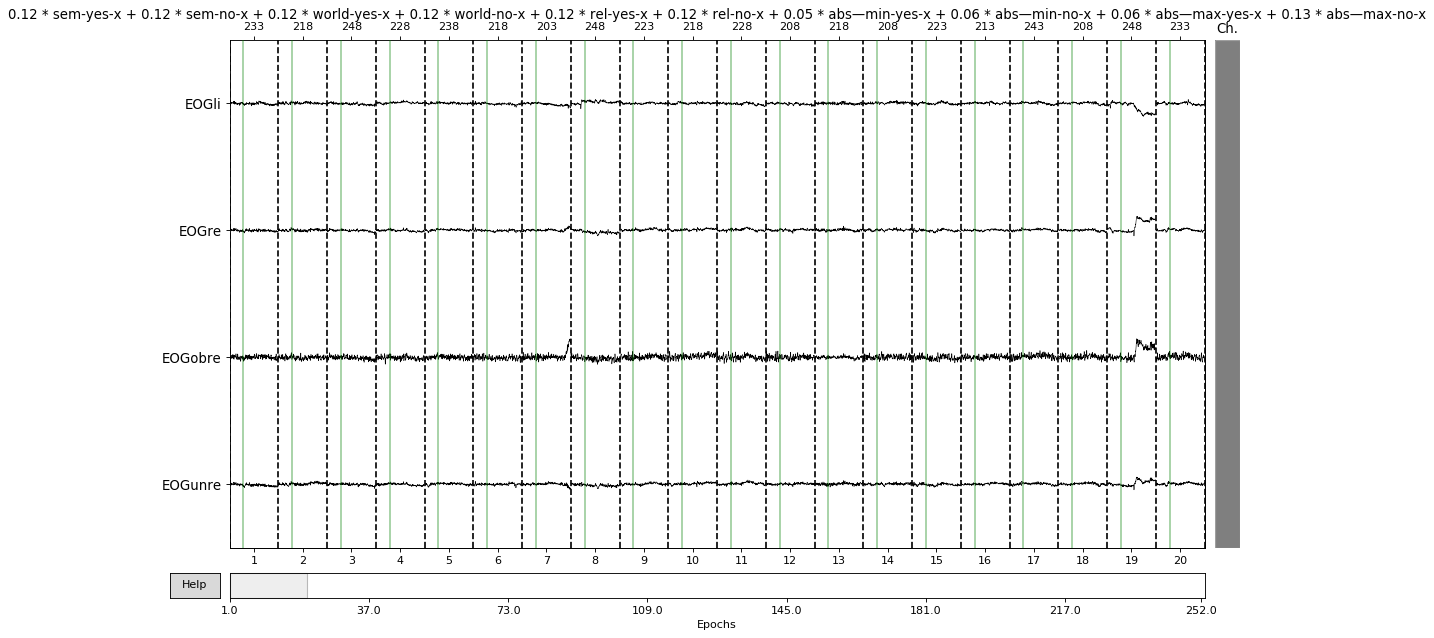

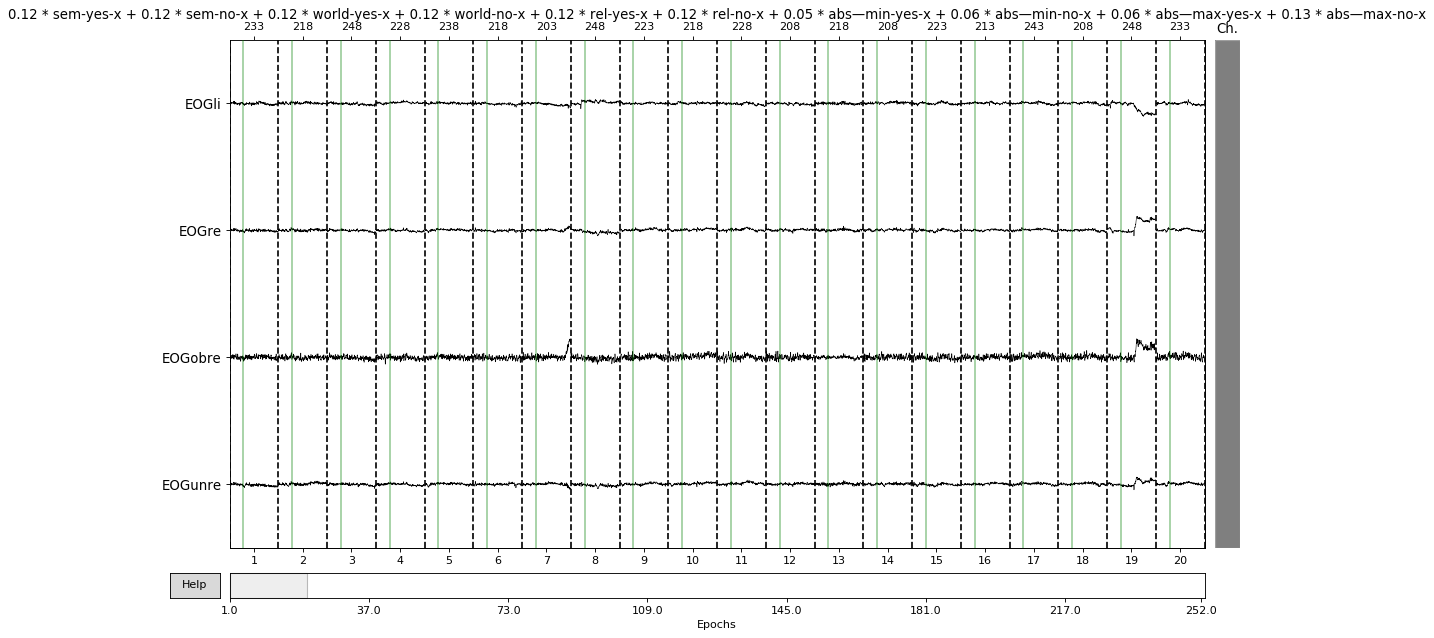

In [4]:
epochs.plot()

In [ ]:
thresholds = np.arange(10,200,10) * 1e-6
drop_rate1 = []
for threshold in thresholds:
    reject = {'eog': threshold}
    #reject = {'eog': 200e-6}
    picks = mne.pick_types(raw.info,eog=True)
    events = mne.find_events(raw)
    # Calculate epochs
    epochs = mne.Epochs(raw, events=events, event_id=event_id, tmin=tmin,
                        tmax=tmax, baseline=baseline, reject=reject, picks=picks)
    epochs.drop_bad()
    epochs.plot_drop_log()
    drop_rate1.append(epochs.drop_log_stats())

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(thresholds,drop_rate)

In [ ]:
plt.plot(thresholds,drop_rate)
plt.plot(thresholds,drop_rate1)

In [ ]:
plt.show()